In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import fit_plot, get_PU_labels


from multilayer_perceptron import MultilayerPerceptron
from pu_learning import ClassDepLossMultilayerPerceptron

In [2]:
# Network Parameters
n_input = 2
n_classes = 2

In [3]:
X, y = datasets.make_moons(n_samples=800, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


# Multilayer Perceptron without PU

('Epoch:', '0001', 'cost=', '0.709301516')
('Epoch:', '0006', 'cost=', '0.565201133')
('Epoch:', '0011', 'cost=', '0.557926968')
('Epoch:', '0016', 'cost=', '0.550158918')
('Epoch:', '0021', 'cost=', '0.545471609')
('Epoch:', '0026', 'cost=', '0.536362842')
('Epoch:', '0031', 'cost=', '0.529875964')
('Epoch:', '0036', 'cost=', '0.525793493')
('Epoch:', '0041', 'cost=', '0.522139207')
('Epoch:', '0046', 'cost=', '0.519709110')
('Epoch:', '0051', 'cost=', '0.514246181')
('Epoch:', '0056', 'cost=', '0.524306282')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

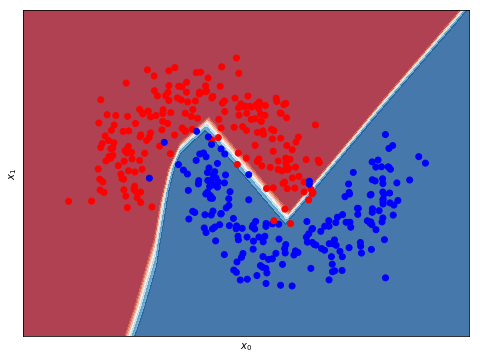

In [7]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          beta=0,
                          training_epochs=60,
                          verbose=True)
fit_plot(X_train, Y_train, mp)

# PU setup

In [4]:
Y_train_pu = get_PU_labels(Y_train, random_seed=42)

('Positive (pct_missing=0.0):', 197, ' vs.', 197)
('Positive (pct_missing=0.1):', 197, ' vs.', 182)
('Positive (pct_missing=0.2):', 197, ' vs.', 148)
('Positive (pct_missing=0.3):', 197, ' vs.', 134)
('Positive (pct_missing=0.4):', 197, ' vs.', 121)
('Positive (pct_missing=0.5):', 197, ' vs.', 94)
('Positive (pct_missing=0.6):', 197, ' vs.', 72)
('Positive (pct_missing=0.7):', 197, ' vs.', 64)
('Positive (pct_missing=0.8):', 197, ' vs.', 36)
('Positive (pct_missing=0.9):', 197, ' vs.', 19)
('Positive (pct_missing=1.0):', 197, ' vs.', 0)


### Normal

('Using class_weight', array([ 1.        ,  3.23157895]))
('Epoch:', '0001', 'cost=', '0.784378260')
('Epoch:', '0006', 'cost=', '0.735112473')
('Epoch:', '0011', 'cost=', '0.735579297')
('Epoch:', '0016', 'cost=', '0.730337903')
('Epoch:', '0021', 'cost=', '0.727173358')
('Epoch:', '0026', 'cost=', '0.726644501')
('Epoch:', '0031', 'cost=', '0.727707267')
('Epoch:', '0036', 'cost=', '0.718943253')
('Epoch:', '0041', 'cost=', '0.711117551')
('Epoch:', '0046', 'cost=', '0.711705998')
('Epoch:', '0051', 'cost=', '0.705564201')
('Epoch:', '0056', 'cost=', '0.704721451')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

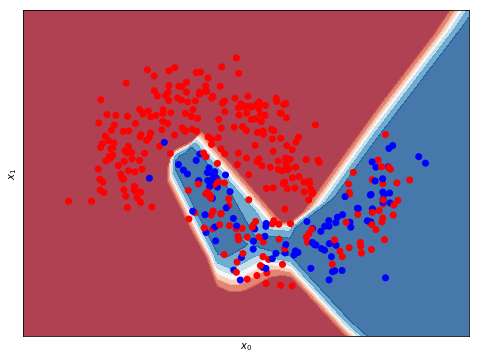

In [20]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          beta=0,
                          training_epochs=60,
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp)

### Class weighted

('Using class_weight', array([  1.        ,  19.72972973]))
('Epoch:', '0001', 'cost=', '1.214683980')
('Epoch:', '0006', 'cost=', '1.074391887')
('Epoch:', '0011', 'cost=', '1.027517185')
('Epoch:', '0016', 'cost=', '1.015152782')
('Epoch:', '0021', 'cost=', '1.007934704')
('Epoch:', '0026', 'cost=', '1.002162546')
('Epoch:', '0031', 'cost=', '0.991907343')
('Epoch:', '0036', 'cost=', '0.982259288')
('Epoch:', '0041', 'cost=', '0.978195027')
('Epoch:', '0046', 'cost=', '0.973765209')
('Epoch:', '0051', 'cost=', '0.973109320')
('Epoch:', '0056', 'cost=', '0.970059440')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

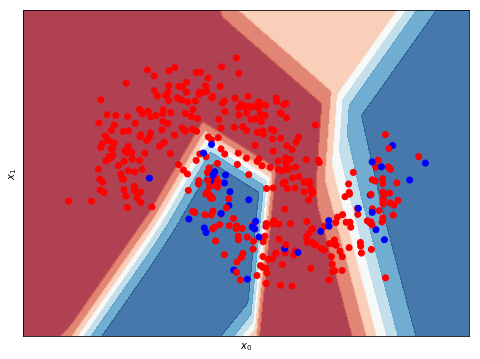

In [22]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          beta=0,
                          training_epochs=60,
                          class_weight=[.5, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.8), mp)

### Class dependent loss

('Using class_weight', array([ 1.        ,  3.23157895]))
('Epoch:', '0001', 'cost=', '0.428663917')
('Epoch:', '0006', 'cost=', '0.417503528')
('Epoch:', '0011', 'cost=', '0.417503528')
('Epoch:', '0016', 'cost=', '0.417503528')
('Epoch:', '0021', 'cost=', '0.417503521')
('Epoch:', '0026', 'cost=', '0.417503536')
('Epoch:', '0031', 'cost=', '0.417503521')
('Epoch:', '0036', 'cost=', '0.417503513')
('Epoch:', '0041', 'cost=', '0.417503513')
('Epoch:', '0046', 'cost=', '0.417503521')
('Epoch:', '0051', 'cost=', '0.417503528')
('Epoch:', '0056', 'cost=', '0.417503521')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

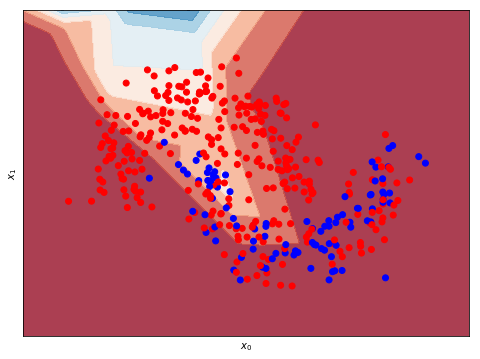

In [16]:
cdmp = ClassDepLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          beta=0,
                          training_epochs=60,
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), cdmp)